<center>

# Diplo 2021
# Árboles de decisión

    Práctico: A- G. Flesia

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn import decomposition
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D



/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Scatter plot Iris')

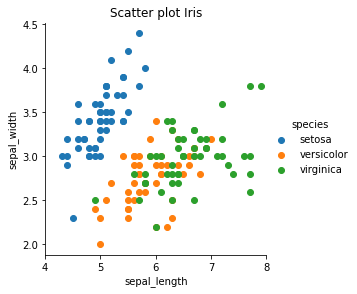

In [2]:
iris = sns.load_dataset("iris")

g1=sns.FacetGrid(iris, hue="species", size=4) .map(plt.scatter,"sepal_length", "sepal_width" ).add_legend()
g1.ax.set_xlim(4, 8)
plt.title('Scatter plot Iris')
#plt.savefig('images/01_pca_lda.png', dpi=300)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


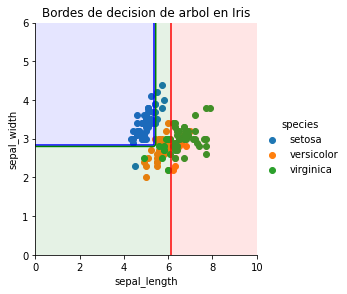

In [4]:
# extract sepal length and sepal width
X_data2 = iris.iloc[:, [0,1]].values
y_data2 = iris.iloc[:,4].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()

#lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
#lda.fit(X_data2,y_data2)
tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=2, 
                              random_state=1)
tree.fit(X_data2,y_data2)

# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(0, 10, N)
Y = np.linspace(0, 6, N)
X, Y = np.meshgrid(X, Y)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(iris, hue="species", size=4) .map(plt.scatter, "sepal_length", "sepal_width",).add_legend()
my_ax = g.ax


#Computing the predicted class function for each value on the grid
zz = np.array(  [tree.predict( np.array([[xx,yy]])) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
    
#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)


#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('sepal_length')
my_ax.set_ylabel('sepal_width')
my_ax.set_title('Bordes de decision de arbol en Iris')


#plt.savefig('images/02_pca_lda.png', dpi=300)
plt.show()

In [5]:
pca = decomposition.PCA(n_components=2)
# extract sepal length and sepal width
X_data = iris.iloc[:, :4].values
#print(X_data)
pca.fit(X_data)
data = pca.transform(X_data)
vr = pca.explained_variance_ratio_
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648]


In [6]:

df = pd.DataFrame(data, columns=["PC1", "PC2"])
df['species'] = iris.iloc[:, 4]
y_labels = iris.iloc[:,4].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(-4.0, 4.0)

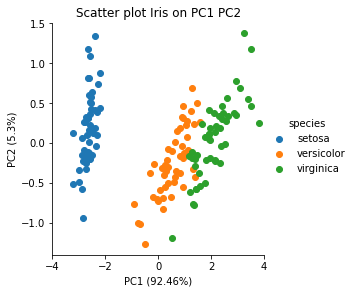

In [7]:

g=sns.FacetGrid(df, hue="species", size=4) .map(plt.scatter,"PC1", "PC2", ).add_legend()
plt.title('Scatter plot Iris on PC1 PC2')
g.ax.set_xlabel('PC1 (92.46%)')
g.ax.set_ylabel('PC2 (5.3%)')
g.ax.set_xlim(-4, 4)
#plt.savefig('images/03_pca_lda.png', dpi=300)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


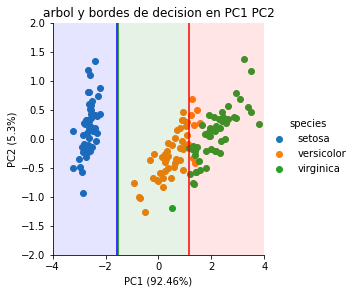

In [9]:


#lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
#lda.fit(data,y_labels)
tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=2, 
                              random_state=1)
tree.fit(data,y_labels)

# Our 2-dimensional distribution will be over variables X and Y
N = 100
X3 = np.linspace(-4, 4, N)
Y3 = np.linspace(-2, 2, N)
X3, Y3 = np.meshgrid(X3, Y3)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(df, hue="species", size=4, ) .map(plt.scatter, "PC1", "PC2",)  .add_legend()
my_ax = g.ax


#Computing the predicted class function for each value on the grid
zz3 = np.array(  [tree.predict( np.array([[xx3,yy3]])) 
                     for xx3, yy3 in zip(np.ravel(X3), np.ravel(Y3)) ] )
    
#Reshaping the predicted class into the meshgrid shape
Z3 = zz3.reshape(X3.shape)


#Plot the filled and boundary contours
my_ax.contourf( X3, Y3, Z3, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X3, Y3, Z3, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title

my_ax.set_xlabel('PC1 (92.46%)')
my_ax.set_ylabel('PC2 (5.3%)')
my_ax.set_title('arbol y bordes de decision en PC1 PC2')


#plt.savefig('images/04_pca_lda.png', dpi=300)
plt.show()

In [10]:
# original data
X_data3 = iris.iloc[:, :4].values
y_data3 = iris.iloc[:,4].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()

lda = LinearDiscriminantAnalysis(n_components=2,solver="svd", store_covariance=True)
X_r1 = lda.fit(X_data3,y_data3).transform(X_data3)




In [11]:
df1 = pd.DataFrame(X_r1, columns=["LD1","LD2"])

df1['species'] = iris.iloc[:, 4]

#df1.head()
datas=df1.iloc[:, :2].values
#print(datas)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


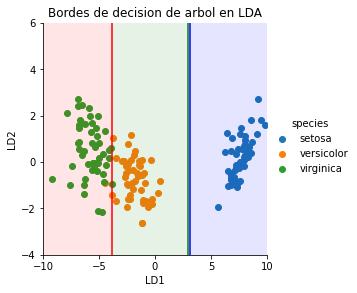

In [12]:
#lda2 = LinearDiscriminantAnalysis(n_components=2,solver="svd", store_covariance=True)

#lda2.fit(datas,y_data3)

tree2 = DecisionTreeClassifier(criterion='gini', 
                              max_depth=2, 
                              random_state=1)
tree2.fit(datas,y_data3)


# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(-10, 10, N)
Y = np.linspace(-4, 6, N)
X, Y = np.meshgrid(X, Y)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()

#Computing the predicted class function for each value on the grid
zz = np.array(  [tree2.predict( np.array([[xx,yy]])) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
    
#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(df1, hue="species", size=4) .map(plt.scatter, "LD1", "LD2",).add_legend()
my_ax = g.ax



#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('LD1')
my_ax.set_ylabel('LD2')
my_ax.set_title('Bordes de decision de arbol en LDA')


#plt.savefig('images/02_lda_lda.png', dpi=300)

plt.show()

DecisionTreeClassifier proporciona parámetros como min_samples_leaf y max_depth para evitar que un árbol se ajuste en exceso. La poda usando una funcion de costo de la complejidad proporciona otra opción para controlar el tamaño de un árbol. En DecisionTreeClassifier, esta técnica de poda está parametrizada por el parámetro ccp_alpha. Los valores más altos de ccp_alpha aumentan el número de nodos podados. 

Mañana vamos a mostrar un ejemplo real de como ajustar un arbol usando min_samples_leaf y max_depth.

In [13]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities


In [15]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Accuracy scores')

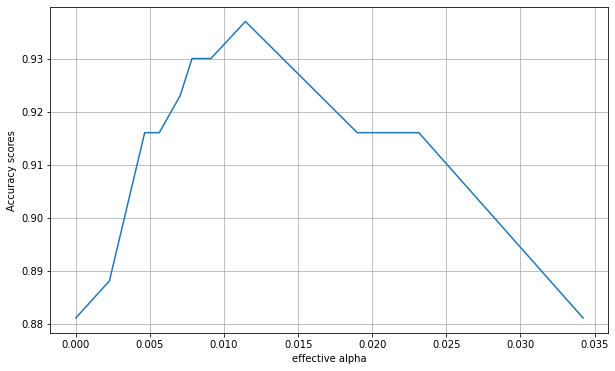

In [16]:
from sklearn.metrics import accuracy_score

acc_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

Un alpha de 0.013 da un buen valor de accuracy. 

Text(0, 0.5, 'total depth')

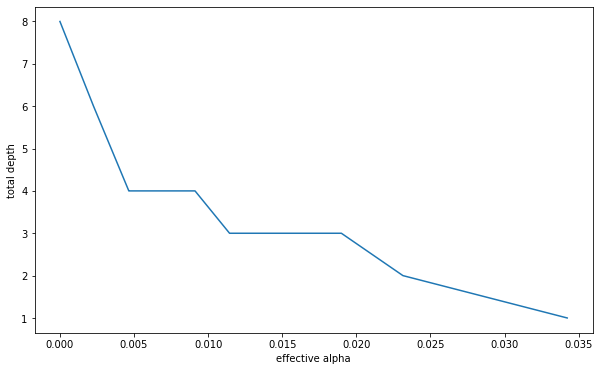

In [17]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

La profundidad de el arbol de alpha 0 0.13 es de 3. 

In [21]:
model = DecisionTreeClassifier(random_state=42, max_depth=3).fit(X,y)

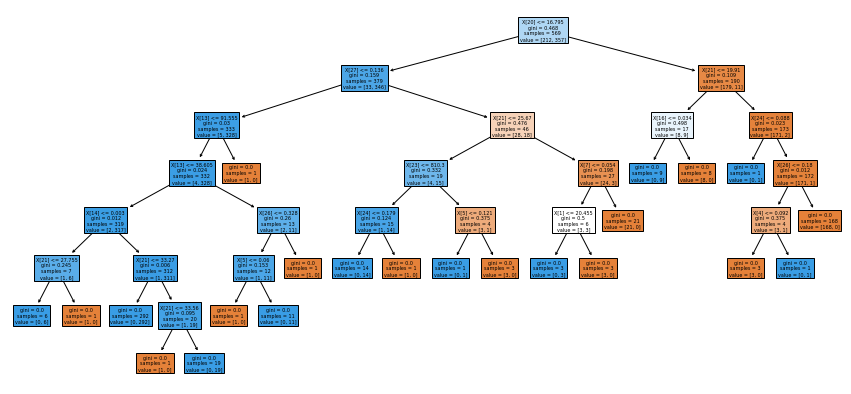

In [26]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,7))
tree.plot_tree(model,filled=True)
plt.show()

In [23]:
model = DecisionTreeClassifier(random_state=42).fit(X,y)

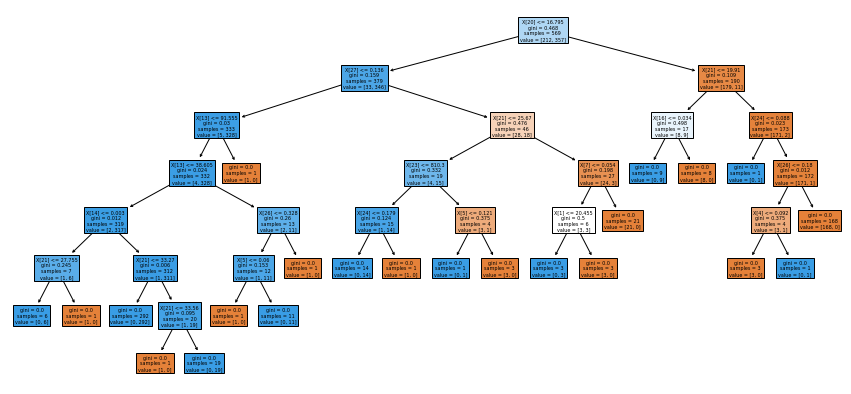

In [25]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,7))
tree.plot_tree(model,filled=True)
plt.show()